#1.importing librarirs

In [1]:
import os
import tensorflow as tf
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.metrics import Precision, Recall, BinaryAccuracy
from keras.models import load_model

C:\Users\jaswa\AppData\Local\Temp\ipykernel_7924\3210277480.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


#2.CLEANING DATA

In [2]:
data_directory ='fruits-360' 

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
# for img_test in os.listdir(data_directory):
#     # print(img_test)
#     for image_type in os.listdir(os.path.join(data_directory , img_test)):
#         # print(image_type)
#         for image in os.listdir(os.path.join(data_directory , img_test,image_type)):
#             # print(image)
#             image_path = os.path.join(data_directory , img_test,image_type)
#             try:
#                 img = img.read(image_path)
#                 header = imghdr.what(image_path)
#                 print(header)
#                 if header not in image_exts:
#                     print('image header not found')
#                     os.remove(image_path)

#             except Exception as e: 
#                 print('Issue with image {}'.format(image_path))
#                 # os.remove(image_path)


Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple Braeburn
Issue with image fruits-360\Test\Apple B

#3.loading data from data folder

In [5]:
data = tf.keras.utils.image_dataset_from_directory(data_directory+'/Training')

Found 41322 files belonging to 81 classes.


In [6]:
testing = tf.keras.utils.image_dataset_from_directory(data_directory+'/Test')
testing_data = testing.map(lambda x,y: (x/255, y))
test = testing_data.as_numpy_iterator()

Found 13877 files belonging to 81 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

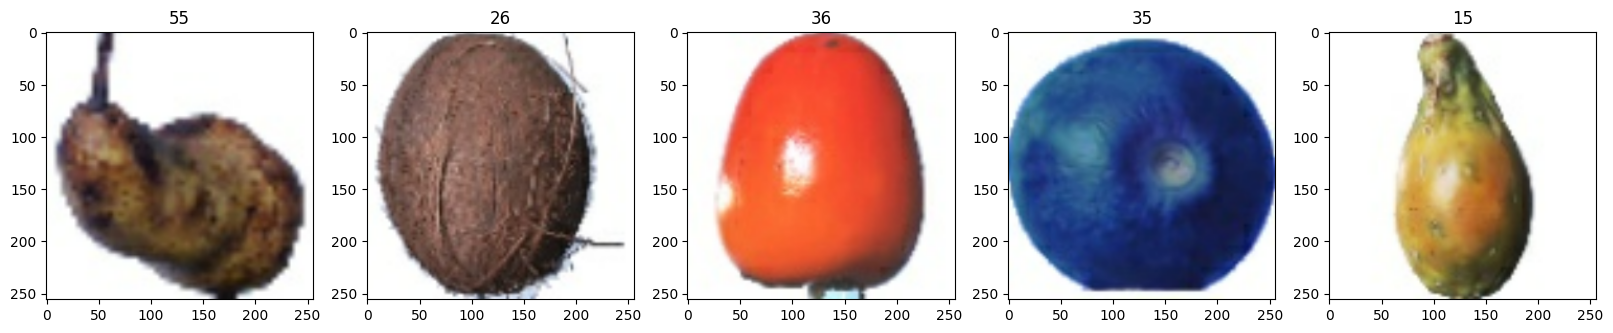

In [9]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data = data.map(lambda x,y: (x/255, y))
len(data)

1292

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#4. Deep learning Model

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Training anf validation of the model


In [18]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
904/904 [==============================] - 425s 469ms/step - loss: -260231481262080.0000 - accuracy: 0.0115 - val_loss: -1575379642875904.0000 - val_accuracy: 0.0128
Epoch 2/20
904/904 [==============================] - 459s 508ms/step - loss: -14516362395254784.0000 - accuracy: 0.0115 - val_loss: -40832211133399040.0000 - val_accuracy: 0.0127
Epoch 3/20
904/904 [==============================] - 467s 516ms/step - loss: -118120181984657408.0000 - accuracy: 0.0116 - val_loss: -232181946292109312.0000 - val_accuracy: 0.0128
Epoch 4/20
499/904 [===============>..............] - ETA: 3:20 - loss: -339769537027112960.0000 - accuracy: 0.0115

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))